<a href="https://colab.research.google.com/github/szakmarynandor/FAKT-MLCourse/blob/main/hazi_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. házi feladat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

##Aktivációs függvények implementálása

###Sigmoid

In [58]:
def sig(x):
 return 1/(1 + np.exp(-x))

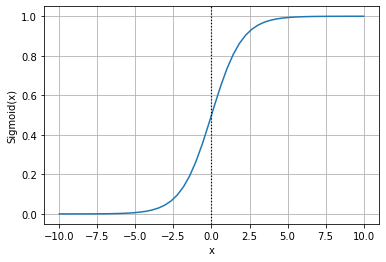

In [84]:
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p)
plt.grid()
plt.axvline(x = 0, linestyle = ':', color = 'k', lw=1.2)
plt.show()

##Hyperbolic Tangent

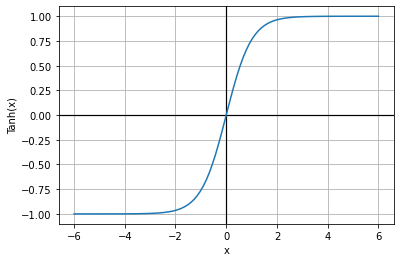

In [86]:
def htan(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

x_data = np.linspace(-6,6,100)
y_data = htan(x_data)

# Ábrázolás
plt.grid()
plt.xlabel("x") 
plt.ylabel("Tanh(x)")  
plt.axvline(x = 0, linestyle = '-', color = 'k', lw=1.2)
plt.axhline(y = 0, linestyle = '-', color = 'k', lw=1.2)
plt.plot(x_data, y_data)
plt.show()

##DNN alkalmazása regressziós problémára


###Adatbázis importálása

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
df = pd.read_excel('/content/drive/My Drive/FAKT_ML/Cars.xlsx')

In [13]:
df.shape

(317, 7)

In [14]:
df.head()

,Brand,Fuel,Mileage,Consumption,Age,Power,Price
0,Opel,0,557,10.27,24,53,350
1,Volkswagen,1,575,12.15,24,46,380
2,Opel,0,538,11.02,20,48,400
3,Opel,1,532,13.09,21,50,430
4,Volkswagen,0,527,10.47,23,57,450


###Hiányzó értékek vizsgálata

In [15]:
df.isna().sum()

Brand          0
Fuel           0
Mileage        0
Consumption    0
Age            0
Power          0
Price          0
dtype: int64

###Szöveges kategorikus változó átalakítása

In [17]:
labeler = LabelEncoder()
labeler.fit(df.Brand)

LabelEncoder()

In [18]:
df.Brand = labeler.transform(df.Brand)

In [19]:
df.head()

,Brand,Fuel,Mileage,Consumption,Age,Power,Price
0,3,0,557,10.27,24,53,350
1,4,1,575,12.15,24,46,380
2,3,0,538,11.02,20,48,400
3,3,1,532,13.09,21,50,430
4,4,0,527,10.47,23,57,450


In [21]:
y_df=df.Price
x_df = df.copy().drop('Price', axis=1)

In [23]:
y_df.head()

0    350
1    380
2    400
3    430
4    450
Name: Price, dtype: int64

In [24]:
x_df.head()

,Brand,Fuel,Mileage,Consumption,Age,Power
0,3,0,557,10.27,24,53
1,4,1,575,12.15,24,46
2,3,0,538,11.02,20,48
3,3,1,532,13.09,21,50
4,4,0,527,10.47,23,57


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

In [26]:
x_test.shape[0] == y_test.shape[0]

True

###Normalizálás

In [27]:
normalizer = StandardScaler()

In [28]:
normalizer.fit(x_train)

StandardScaler()

In [29]:
x_train = normalizer.transform(x_train) #alkalmazzuk a normalizálót

In [30]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,1.346564,-1.123345,-0.477403,-1.369969,-0.814972,0.040839
1,-1.517396,0.890198,-0.714410,-1.639993,-0.100744,0.313756
2,-1.517396,0.890198,-0.355861,-1.378542,0.327793,0.024785
3,-0.085416,0.890198,-1.218808,-0.761345,-0.814972,1.405425
4,1.346564,-1.123345,0.288310,-0.928502,-0.672126,-0.633427
...,...,...,...,...,...,...
280,-0.085416,-1.123345,-0.805566,0.241600,-0.814972,0.650889
281,1.346564,-1.123345,1.594884,0.751645,1.756250,-1.692988
282,-0.085416,-1.123345,-1.000033,0.164450,-1.529201,1.437533
283,0.630574,0.890198,0.549625,-1.014224,-0.814972,-1.468233


In [31]:
x_test = normalizer.transform(x_test)

##Architektúra

In [32]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [33]:
input = Input(shape=(x_train.shape[1]))
x = Dense(8, activation='relu')(input)
x = Dense(16, activation='relu')(x)
x = Dense(16, activation='relu')(x)
output = Dense(1, activation='linear')(x)

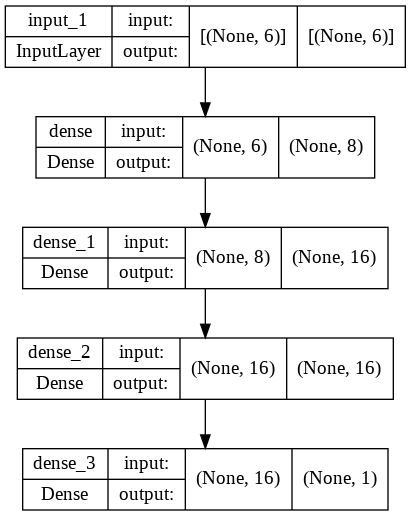

In [36]:
model = keras.Model(input, output)
plot_model(model, show_shapes=True)

In [37]:
model.compile(loss = 'MSE', metrics = ['MeanSquaredError'])

In [38]:
model.fit(x=x_train, y=y_train, epochs=20)

Epoch 1/20
9/9 [==============================] - 1s 3ms/step - loss: 9692263.0000 - mean_squared_error: 9692264.0000
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 9691066.0000 - mean_squared_error: 9691066.0000
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 9689932.0000 - mean_squared_error: 9689932.0000
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 9688714.0000 - mean_squared_error: 9688714.0000
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 9687359.0000 - mean_squared_error: 9687359.0000
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 9685784.0000 - mean_squared_error: 9685784.0000
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 9683979.0000 - mean_squared_error: 9683979.0000
Epoch 8/20
9/9 [==============================] - 0s 3ms/step - loss: 9681854.0000 - mean_squared_error: 9681854.0000
Epoch 9/20
9/9 [==============================] - 0s 4ms

In [39]:
model.predict(x_test)

array([[13.044724 ],
       [10.863022 ],
       [13.079163 ],
       [12.709276 ],
       [19.491545 ],
       [14.102538 ],
       [10.317851 ],
       [14.478822 ],
       [13.834979 ],
       [17.116163 ],
       [ 9.33492  ],
       [22.53388  ],
       [18.018795 ],
       [14.174873 ],
       [12.577195 ],
       [13.696195 ],
       [10.065673 ],
       [22.312428 ],
       [ 7.9337826],
       [ 9.869885 ],
       [10.647239 ],
       [16.143276 ],
       [21.229925 ],
       [13.716181 ],
       [10.374157 ],
       [14.325738 ],
       [14.010422 ],
       [14.462724 ],
       [11.095773 ],
       [ 9.574521 ],
       [13.698624 ],
       [22.53388  ]], dtype=float32)

In [40]:
model.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 185ms/step - loss: 10261207.0000 - mean_squared_error: 10261207.0000


[10261207.0, 10261207.0]